A notebook to process experimental results of ex1_vary_n.py. p(reject) as problem sample size increases.

In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import kgof.data as data
import lkgof.glo as glo
import lkgof.goftest as gof
import kgof.kernel as kernel
import lkgof.plot as plot
import kgof.util as util

import scipy.stats as stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
plot.set_default_matplotlib_options()

In [41]:
def load_plot_vs_ns(fname, show_legend=True, xscale='linear', yscale='linear'):
    """
    ns = sample sizes
    """
    func_xvalues = lambda agg_results: agg_results['ns']
    ex = 2
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    #plt.figure(figsize=(10,5))
    results = plot.plot_prob_reject(
        ex, fname, func_xvalues, '', func_title=func_title)
    
    plt.title('')
    
    if xscale is not None:
        plt.xscale(xscale)
    if yscale is not None:
        plt.yscale(yscale)
    
    plt.xlabel('Sample size $n$')
    plt.gca().legend(loc='best').set_visible(show_legend)
    if show_legend:
        plt.legend(bbox_to_anchor=(1.0, 1.05))
        
    plt.grid(False)
    return results


def load_runtime_vs_ns(fname, xlabel='Sample size $n$', 
                      show_legend=True, xscale='linear', yscale='linear'):
    func_xvalues = lambda agg_results: agg_results['ns']
    ex = 2
    def func_title(agg_results):
        repeats, _, n_methods = agg_results['job_results'].shape
        alpha = agg_results['alpha']
        title = '%s. %d trials. $\\alpha$ = %.2g.'%\
            ( agg_results['prob_label'], repeats, alpha)
        return title
    #plt.figure(figsize=(10,6))
    
    results = plot.plot_runtime(ex, fname,  
                                func_xvalues, xlabel=xlabel, func_title=func_title)
    
    plt.title('')
    plt.gca().legend(loc='best').set_visible(show_legend)
    if show_legend:
        plt.legend(bbox_to_anchor=(1.0, 1.05))
    
    #plt.grid(True)
    if xscale is not None:
        plt.xscale(xscale)
    if yscale is not None:
        plt.yscale(yscale)
    return results


In [33]:
np.set_printoptions(precision=4)

## $(\alpha_{0P}, \alpha_{0Q})=(1.1, 1.1)$

LKSD (GBoW, V-stat) [0.0333 0.1367 0.1067 0.09  ] [-0.1579  0.1217  0.0028 -0.0224] [1.0181 0.9961 0.9663 0.9737]
pval LKSD (GBoW, V-stat) [0.5382 0.4606 0.5043 0.5024]
LKSD (GBoW U-stat) [0.0333 0.06   0.0533 0.0433] [-0.1579  0.1217  0.0028 -0.0224] [1.0181 0.9961 0.9663 0.9737]
pval LKSD (GBoW U-stat) [0.5371 0.4636 0.5013 0.5031]
LKSD (GBoW, jackknife) [0.0333 0.0533 0.05   0.0433] [-0.1579  0.1217  0.0028 -0.0224] [1.0181 0.9961 0.9663 0.9737]
pval LKSD (GBoW, jackknife) [0.5372 0.4642 0.5014 0.5032]


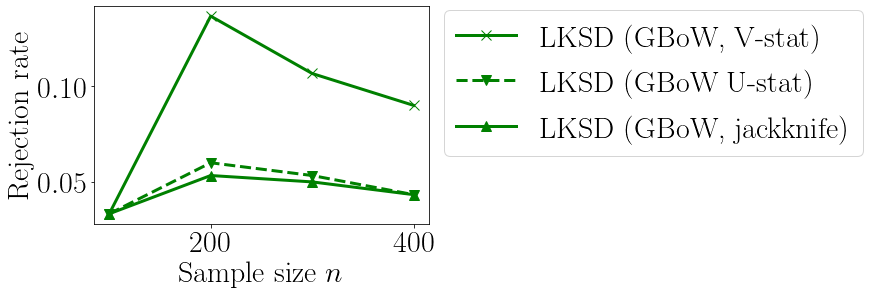

In [34]:
fname = 'ex2-lda_h0_dx50_v100_t3_p1q1-me3_rs300_nmi100_nma400_a0.050.p'
results = load_plot_vs_ns(fname, show_legend=True)
#results = glo.ex_load_result(2, fname)
#plt.savefig(fname.replace('.p', '.pdf', 1), bbox_inches='tight')

## $(\alpha_{0P}, \alpha_{0Q})=(0.5, 0.6)$

MMD (GBoW) [0.0167 0.02   0.0167] [-0.0081 -0.0106 -0.0122] [0.022  0.0187 0.0152]
pval MMD (GBoW) [nan nan nan]
LKSD (GBoW, V-stat) [0.     0.0033 0.    ] [-0.9607 -1.0966 -1.5596] [1.0446 1.0632 1.0353]
pval LKSD (GBoW, V-stat) [0.6786 0.762  0.8671]
LKSD (GBoW U-stat) [0. 0. 0.] [-0.9607 -1.0966 -1.5596] [1.0446 1.0632 1.0353]
pval LKSD (GBoW U-stat) [0.7437 0.7751 0.8592]


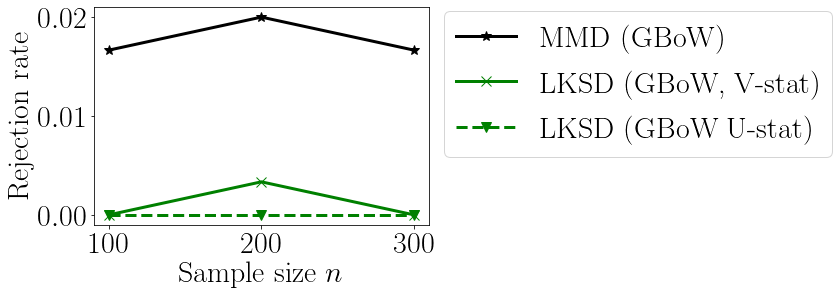

In [35]:
fname = 'ex2-lda_h0_dx50_v100_t3_p04q05-me3_rs300_nmi100_nma300_a0.010.p'
results = load_plot_vs_ns(fname, show_legend=True)
#results = glo.ex_load_result(2, fname)

## $(\alpha_{0P}, \alpha_{0Q})=(0.6, 0.7)$

MMD (GBoW) [0.0467 0.05   0.0467] [-0.0079 -0.0081 -0.0106] [0.0217 0.0172 0.0162]
pval MMD (GBoW) [nan nan nan]
LKSD (GBoW, V-stat) [0.0033 0.0133 0.    ] [-0.8512 -0.9674 -1.3699] [1.0117 1.0463 1.0432]
pval LKSD (GBoW, V-stat) [0.6683 0.7484 0.8444]
LKSD (GBoW U-stat) [0.0033 0.0167 0.    ] [-0.8512 -0.9674 -1.3699] [1.0117 1.0463 1.0432]
pval LKSD (GBoW U-stat) [0.721  0.7525 0.8288]


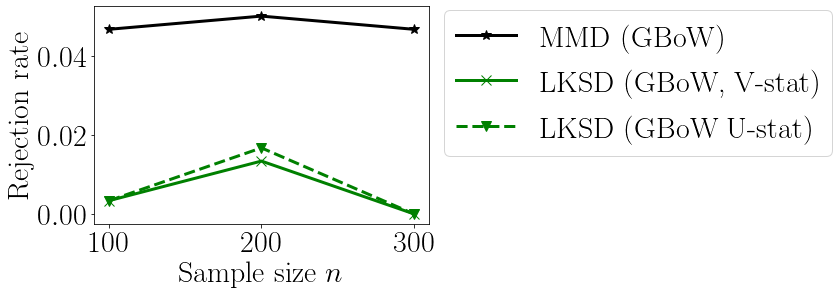

In [36]:
fname = 'ex2-lda_h0_dx50_v100_t3_p05q06-me3_rs300_nmi100_nma300_a0.050.p'
results = load_plot_vs_ns(fname, show_legend=True)
#results = glo.ex_load_result(2, fname)

## $(\alpha_{0P}, \alpha_{0Q})=(1.1, 0.6)$

MMD (GBoW) [0.1967 0.3833 0.4867] [0.022  0.0323 0.0401] [0.0199 0.0179 0.0159]
pval MMD (GBoW) [nan nan nan]
LKSD (GBoW, V-stat) [0.3467 0.8567 0.9933] [2.9393 4.4279 5.336 ] [1.0636 1.0891 0.9525]
pval LKSD (GBoW, V-stat) [0.083  0.0091 0.0003]
LKSD (GBoW U-stat) [0.6833 0.9767 1.    ] [2.9393 4.4279 5.336 ] [1.0636 1.0891 0.9525]
pval LKSD (GBoW U-stat) [2.2848e-02 1.9395e-03 3.6898e-05]


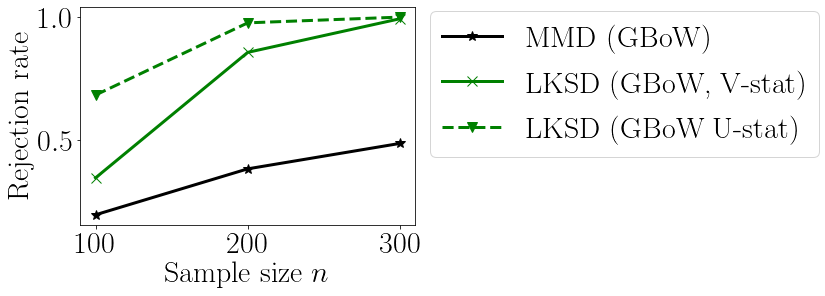

In [37]:
fname = 'ex2-lda_h1_dx50_v100_t3_p1q05-me3_rs300_nmi100_nma300_a0.010.p'
results = load_plot_vs_ns(fname, show_legend=True)
#results = glo.ex_load_result(2, fname)

## $(\alpha_{0P}, \alpha_{0Q})=(1.1, 0.9)$

MMD (GBoW) [0.1267 0.16   0.31  ] [0.0068 0.0109 0.0138] [0.0214 0.0175 0.015 ]
pval MMD (GBoW) [nan nan nan]
LKSD (GBoW, V-stat) [0.1633 0.54   0.69  ] [0.8751 1.5832 1.7588] [1.0024 1.0217 0.9411]
pval LKSD (GBoW, V-stat) [0.2992 0.1265 0.0793]
LKSD (GBoW U-stat) [0.2367 0.4967 0.5567] [0.8751 1.5832 1.7588] [1.0024 1.0217 0.9411]
pval LKSD (GBoW U-stat) [0.2643 0.1285 0.0988]


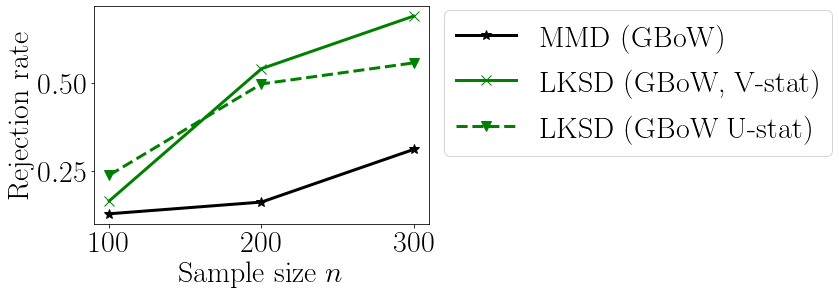

In [38]:
fname = 'ex2-lda_h1_dx50_v100_t3_p1q08-me3_rs300_nmi100_nma300_a0.050.p'
results = load_plot_vs_ns(fname, show_legend=True)
#results = glo.ex_load_result(2, fname)